# Meta Analytics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Inca Tribe House Prices.csv to Inca Tribe House Prices.csv


In [ ]:
!pip install pandas matplotlib seaborn

*Rough workings*

                Type     Price  Bedrooms  Bathrooms  Area Furnished    Level  \
0             Chalet     70000       2.0        2.0  10.0       Yes  Unknown   
1          Apartment   1500000       3.0        3.0  10.0        No        4   
2  Stand Alone Villa  29000000       5.0        6.0  11.0        No  Unknown   
3             Chalet   3000000       2.0        2.0  12.0        No   Ground   
4          Apartment   1128000       3.0        2.0  14.0        No        3   

        Compound   Payment_Option  Delivery_Date Delivery_Term  \
0  Fanar De Luna             Cash  Ready to move      Finished   
1        Unknown  Unknown Payment  Ready to move      Unknown    
2         Mivida             Cash  Ready to move  Core & Shell   
3       Marina 5             Cash  Ready to move      Finished   
4  Beit Al Watan      Installment           soon      Unknown    

                   City  
0            Ain Sukhna  
1  New Hut - El Tagamoa  
2  New Hut - El Tagamoa  
3           North 

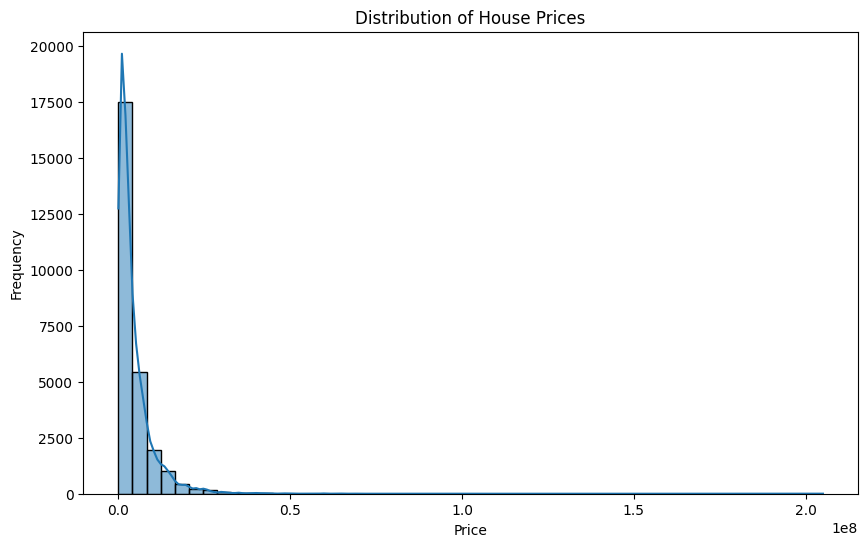

City
Gouna              1.179562e+07
Mokattam           9.314065e+06
Giza District      9.301667e+06
Kabbary            7.405000e+06
Rehab City         7.260656e+06
                       ...     
Mit Ghamr          2.800000e+05
Minya al-Qamh      2.400000e+05
Dhahria            1.900000e+05
Dawahy District    1.527750e+05
Khosous            7.000000e+04
Name: Price, Length: 178, dtype: float64


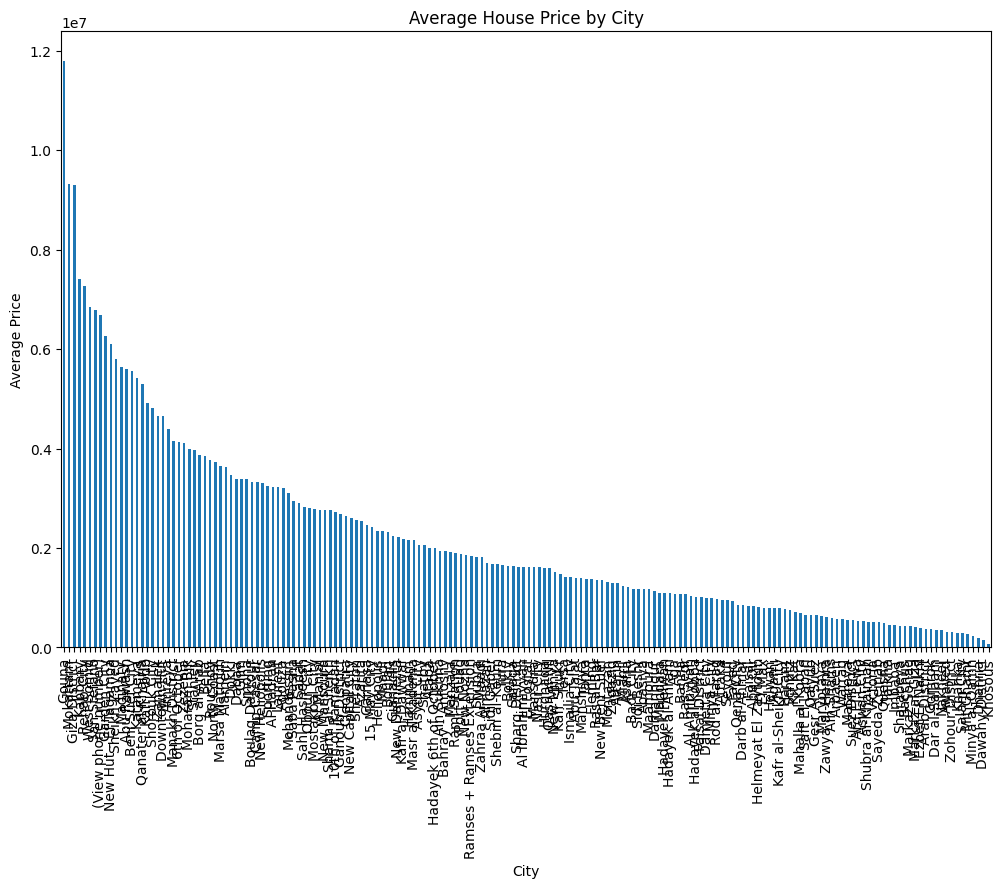

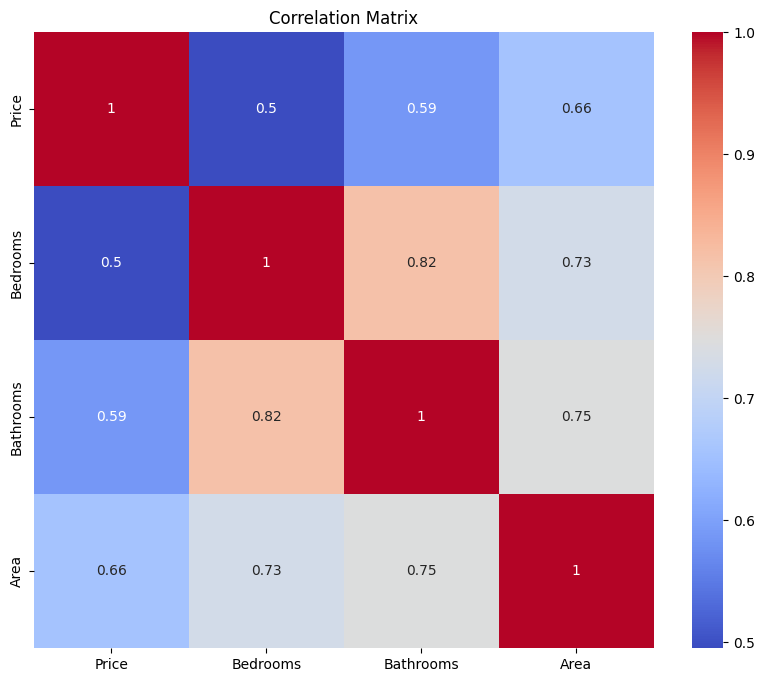

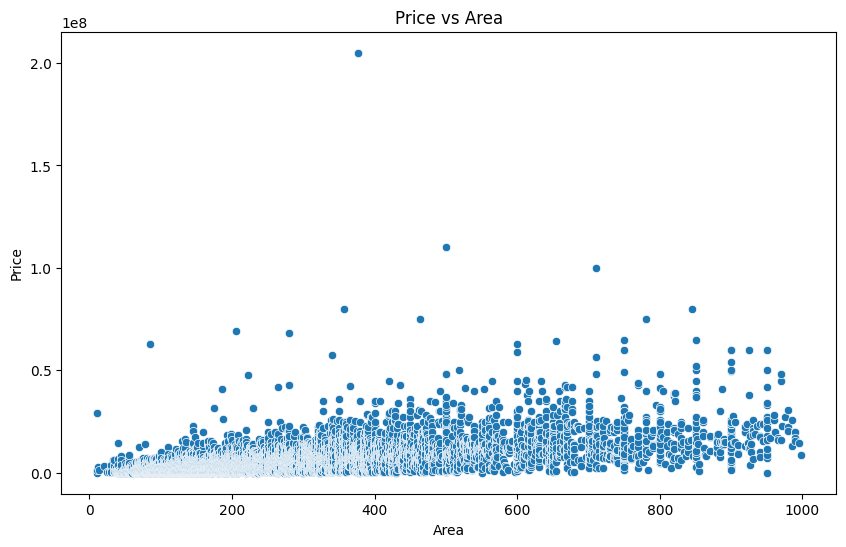

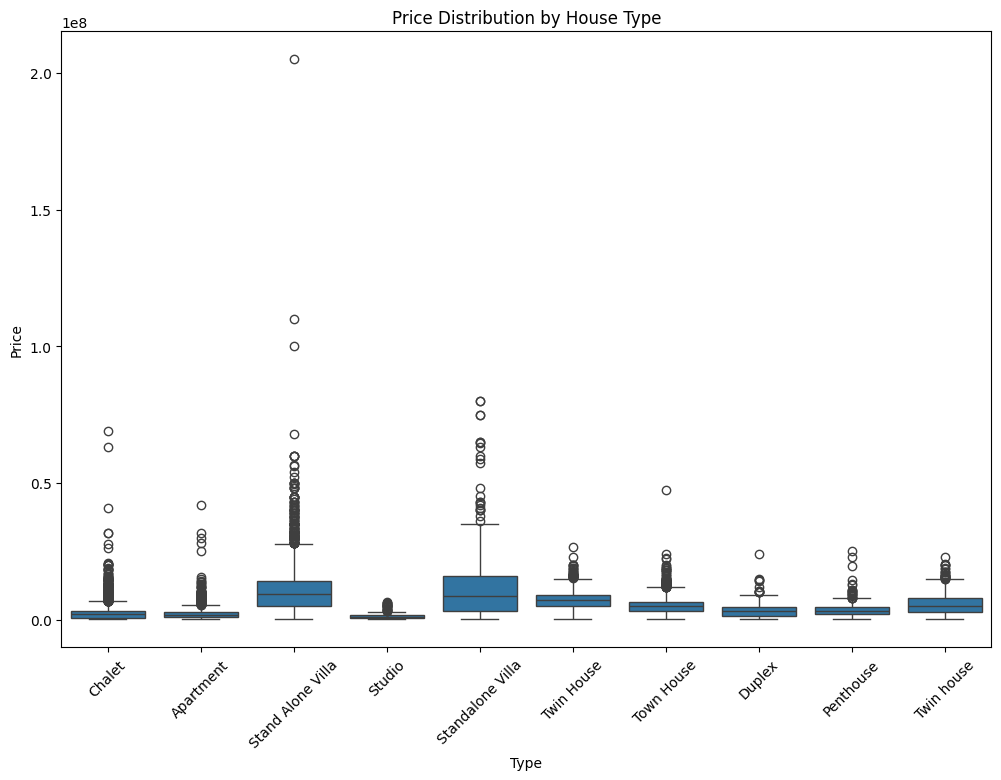

City
New Hut - El Tagamoa    6597
North Coast             6328
Sheikh Zayed            2315
6th of October          1732
Ain Sukhna              1706
                        ... 
Ataba                      1
Quesna                     1
Markaz al-Giza             1
Aga                        1
Qanater al-Khairia         1
Name: count, Length: 178, dtype: int64


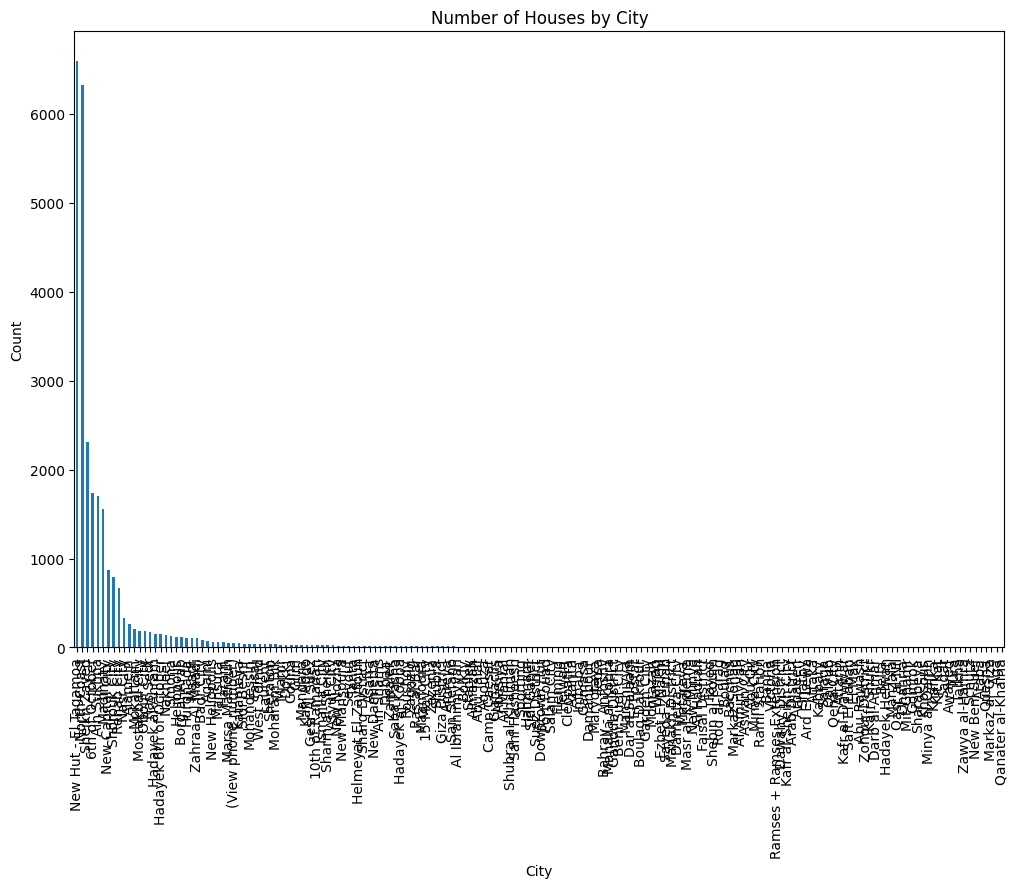

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('Inca Tribe House Prices.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Basic information about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data Cleaning: Fill missing values or drop columns/rows with too many missing values
# For example, let's drop rows where 'Price' is missing
df = df.dropna(subset=['Price'])

# Ensure 'Price' and 'Area' are numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Drop rows where 'Price' or 'Area' is NaN after conversion
df = df.dropna(subset=['Price', 'Area'])

# Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Average price by city
avg_price_by_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_city)

# Visualize average price by city
plt.figure(figsize=(12, 8))
avg_price_by_city.plot(kind='bar')
plt.title('Average House Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Correlation matrix to see relationships between numerical variables
# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of Price vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Box plot of Price by Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution by House Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Count of houses by city
city_counts = df['City'].value_counts()
print(city_counts)

# Visualize count of houses by city
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar')
plt.title('Number of Houses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Applying LLMS

In [ ]:
import pandas as pd

# Load the CSV file
csv_file_path = "Inca Tribe House Prices.csv"  # Replace with your actual file path
df = pd.read_csv(csv_file_path)

# Extract a sample of the data (e.g., first 5 rows)
data_sample = df.head().to_string()

# Print the sample
print("Data Sample:")
print(data_sample)

Data Sample:
                Type     Price  Bedrooms  Bathrooms  Area Furnished    Level       Compound   Payment_Option  Delivery_Date Delivery_Term                  City
0             Chalet     70000       2.0        2.0  10.0       Yes  Unknown  Fanar De Luna             Cash  Ready to move      Finished            Ain Sukhna
1          Apartment   1500000       3.0        3.0  10.0        No        4        Unknown  Unknown Payment  Ready to move      Unknown   New Hut - El Tagamoa
2  Stand Alone Villa  29000000       5.0        6.0  11.0        No  Unknown         Mivida             Cash  Ready to move  Core & Shell  New Hut - El Tagamoa
3             Chalet   3000000       2.0        2.0  12.0        No   Ground       Marina 5             Cash  Ready to move      Finished           North Coast
4          Apartment   1128000       3.0        2.0  14.0        No        3  Beit Al Watan      Installment           soon      Unknown   New Hut - El Tagamoa


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import login

# Authenticate with your Hugging Face token
login(token="")

In [ ]:
!pip install transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Prepare the prompt for more advances models
prompt = f"""
The following is a sample of a dataset:

{data_sample}

Based on the column names and the data,give me a difinition of the headers in context, where do you think this dataset is from? Provide a detailed explanation.
"""

In [ ]:
#Prepare data for less complex llm gpt2

from transformers import AutoModelForCausalLM, AutoTokenizer

# Define your prompt
prompt = """Here is a table containing unkown data. The columns are: Type, Price, Bedrooms, Bathrooms, Area, Furnished, Level, Compound, Payment_Option, Delivery_Date, Delivery_Term, and City. The data includes properties like Chalets, Apartments, and Stand Alone Villas, with details such as price, number of bedrooms, location, and payment options. Based on this table, where do you think it comes from ? What does this data represent?"""

# Load the GPT-2 tokenizer and model
model_name = "gpt2"  # You can also use "gpt2-medium" or "gpt2-large" for larger models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)

# Ensure the attention mask is passed to the model
attention_mask = inputs["attention_mask"]

# Generate a response from GPT-2
outputs = model.generate(
    inputs["input_ids"],
    attention_mask=attention_mask,  # Pass the attention mask
    max_new_tokens=128,  # Set max_new_tokens instead of max_length
    num_return_sequences=1,  # Generate only one response
    no_repeat_ngram_size=2,  # Avoid repeating phrases
    temperature=0.7,  # Control randomness (lower = more deterministic)
    top_k=50,  # Limit the sampling pool
    top_p=0.95,  # Nucleus sampling
    do_sample=True,  # Enable sampling for more creative outputs
    pad_token_id=tokenizer.eos_token_id  # Set the pad token ID to the EOS token ID
)

# Decode the output
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print GPT-2's response
print("GPT-2 Response:")
print(response)

GPT-2 Response:
Here is a table containing unkown data. The columns are: Type, Price, Bedrooms, Bathrooms, Area, Furnished, Level, Compound, Payment_Option, Delivery_Date, Delivery_Term, and City. The data includes properties like Chalets, Apartments, and Stand Alone Villas, with details such as price, number of bedrooms, location, and payment options. Based on this table, where do you think it comes from ? What does this data represent? This data is provided by the property owner and is available on the web.

This data was generated by a survey of 1,000 developers in Hong Kong. It is based on data from the Hongkongers' Property Owners Survey (HPSS). The property owners are identified by their address and their income. They are also asked about their property values and income, which is the most important factor for the data to be considered. What is your view on Hong kong's current and future developments?
. . . The Hongkyu City Market is currently the first commercial building in the

# Data Preparation

In [ ]:
import pandas as pd

# Load the dataset to examine its contents
file_path = 'Inca Tribe House Prices.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


Automated Tokenizer

In [ ]:
!pip install transformers pandas

In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Inca Tribe House Prices.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
data.head()
print(data.head())

                Type     Price  Bedrooms  Bathrooms  Area Furnished    Level  \
0             Chalet     70000       2.0        2.0  10.0       Yes  Unknown   
1          Apartment   1500000       3.0        3.0  10.0        No        4   
2  Stand Alone Villa  29000000       5.0        6.0  11.0        No  Unknown   
3             Chalet   3000000       2.0        2.0  12.0        No   Ground   
4          Apartment   1128000       3.0        2.0  14.0        No        3   

        Compound   Payment_Option  Delivery_Date Delivery_Term  \
0  Fanar De Luna             Cash  Ready to move      Finished   
1        Unknown  Unknown Payment  Ready to move      Unknown    
2         Mivida             Cash  Ready to move  Core & Shell   
3       Marina 5             Cash  Ready to move      Finished   
4  Beit Al Watan      Installment           soon      Unknown    

                   City  
0            Ain Sukhna  
1  New Hut - El Tagamoa  
2  New Hut - El Tagamoa  
3           North 

1. Objective Selection
We can predict the "Price" column (a continuous variable) based on other features, making this a regression problem.

2. Steps Overview
Data Preparation

Handle missing values.
Encode categorical variables.
Normalize or scale numeric features if needed.
Exploratory Data Analysis (EDA)

Examine distributions and correlations.
Identify any useful transformations for features.
Model Training and Evaluation

Split the data into training and testing sets.
Use regression models like Linear Regression, Random Forest, and Gradient Boosting.
Evaluate using metrics like Mean Absolute Error (MAE) and R-squared.
Insights and Reporting

Identify the most significant predictors.
Present the results and discuss any trends.

In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Inca Tribe House Prices.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
df.head()


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


In [ ]:
# understand the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Compound        27322 non-null  object 
 8   Payment_Option  27322 non-null  object 
 9   Delivery_Date   27322 non-null  object 
 10  Delivery_Term   27322 non-null  object 
 11  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1OAAAoEWpju-tfqWIlXLF8xbNAISOCVdfy_FfRBKnnVA#gid=0


In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Inca Tribe House Prices.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Compound        27322 non-null  object 
 8   Payment_Option  27322 non-null  object 
 9   Delivery_Date   27322 non-null  object 
 10  Delivery_Term   27322 non-null  object 
 11  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB


In [ ]:
data.head()

,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Delivery_Date,Type_Chalet,Type_Duplex,Type_Penthouse,...,City_Zawya al-Hamra,City_Zezenia,City_Zohour District,Delivery_Term_Finished,Delivery_Term_Not Finished,Delivery_Term_Semi Finished,Delivery_Term_Unknown,Payment_Option_Cash or Installment,Payment_Option_Installment,Payment_Option_Unknown Payment
0,70000,2.0,2.0,10.0,1.0,<NA>,Ready to move,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1500000,3.0,3.0,10.0,0.0,4,Ready to move,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,29000000,5.0,6.0,11.0,0.0,<NA>,Ready to move,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3000000,2.0,2.0,12.0,0.0,Ground,Ready to move,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1128000,3.0,2.0,14.0,0.0,3,soon,False,False,False,...,False,False,False,False,False,False,True,False,True,False


*Preposing Analysis (LLM Prompt)*

Missing Values:
Bedrooms     203
Area         471
Bathrooms    171
dtype: int64


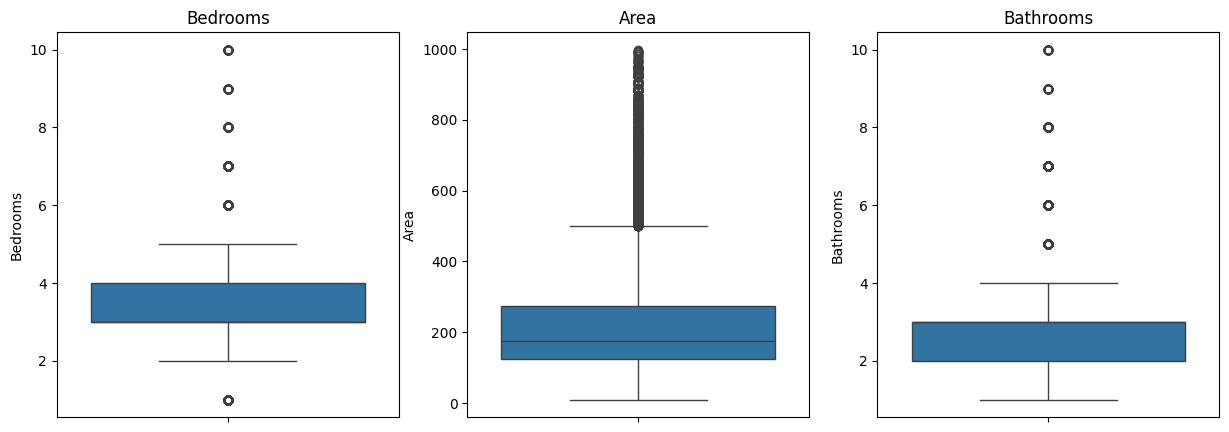


Descriptive Statistics:
           Bedrooms          Area     Bathrooms
count  27119.000000  26851.000000  27151.000000
mean       3.242044    229.305711      2.811388
std        1.212341    161.047915      1.354498
min        1.000000     10.000000      1.000000
25%        3.000000    125.000000      2.000000
50%        3.000000    175.000000      3.000000
75%        4.000000    275.000000      3.000000
max       10.000000    998.000000     10.000000

Processed Data Sample:
   Bedrooms      Area  Bathrooms  Room_to_Area_Ratio  Total_Rooms
0  0.111111  0.000000   0.111111                 inf     0.222222
1  0.222222  0.000000   0.222222                 inf     0.444444
2  0.444444  0.001012   0.555556          439.111111     1.000000
3  0.111111  0.002024   0.111111           54.888889     0.222222
4  0.222222  0.004049   0.111111           54.888889     0.333333

Descriptive Statistics After Preprocessing:
           Bedrooms          Area     Bathrooms  Room_to_Area_Ratio  \
count  

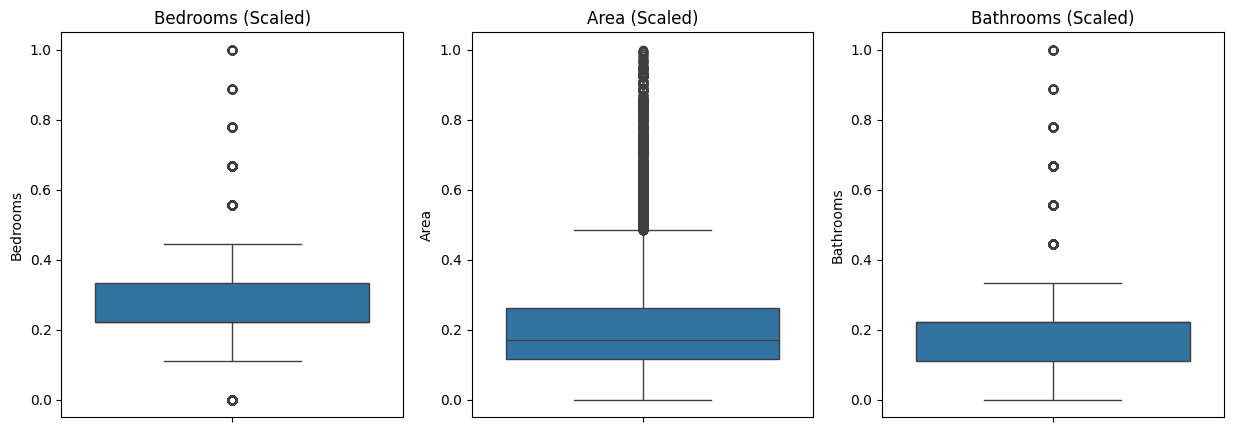

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("Inca Tribe House Prices.csv")

# Step 1: Check for missing values
print("Missing Values:")
print(data[["Bedrooms", "Area", "Bathrooms"]].isnull().sum())

# Step 2: Check for outliers using boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data["Bedrooms"])
plt.title("Bedrooms")

plt.subplot(1, 3, 2)
sns.boxplot(data["Area"])
plt.title("Area")

plt.subplot(1, 3, 3)
sns.boxplot(data["Bathrooms"])
plt.title("Bathrooms")

plt.show()

# Step 3: Check for varying scales using descriptive statistics
print("\nDescriptive Statistics:")
print(data[["Bedrooms", "Area", "Bathrooms"]].describe())

# Step 4: Handle missing values
# Impute numeric columns with the mean (if data is not skewed)
num_imputer = SimpleImputer(strategy="mean")
data[["Bedrooms", "Area", "Bathrooms"]] = num_imputer.fit_transform(data[["Bedrooms", "Area", "Bathrooms"]])

# Step 5: Scale numeric features using MinMaxScaler
scaler = MinMaxScaler()
data[["Bedrooms", "Area", "Bathrooms"]] = scaler.fit_transform(data[["Bedrooms", "Area", "Bathrooms"]])

# Step 6: Feature Engineering
data["Room_to_Area_Ratio"] = data["Bedrooms"] / data["Area"]
data["Total_Rooms"] = data["Bedrooms"] + data["Bathrooms"]

# Step 7: Verify preprocessing steps
print("\nProcessed Data Sample:")
print(data[["Bedrooms", "Area", "Bathrooms", "Room_to_Area_Ratio", "Total_Rooms"]].head())

# Step 8: Check for outliers and scales again after preprocessing
print("\nDescriptive Statistics After Preprocessing:")
print(data[["Bedrooms", "Area", "Bathrooms", "Room_to_Area_Ratio", "Total_Rooms"]].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data["Bedrooms"])
plt.title("Bedrooms (Scaled)")

plt.subplot(1, 3, 2)
sns.boxplot(data["Area"])
plt.title("Area (Scaled)")

plt.subplot(1, 3, 3)
sns.boxplot(data["Bathrooms"])
plt.title("Bathrooms (Scaled)")

plt.show()

*From The Prepossing Analysis*

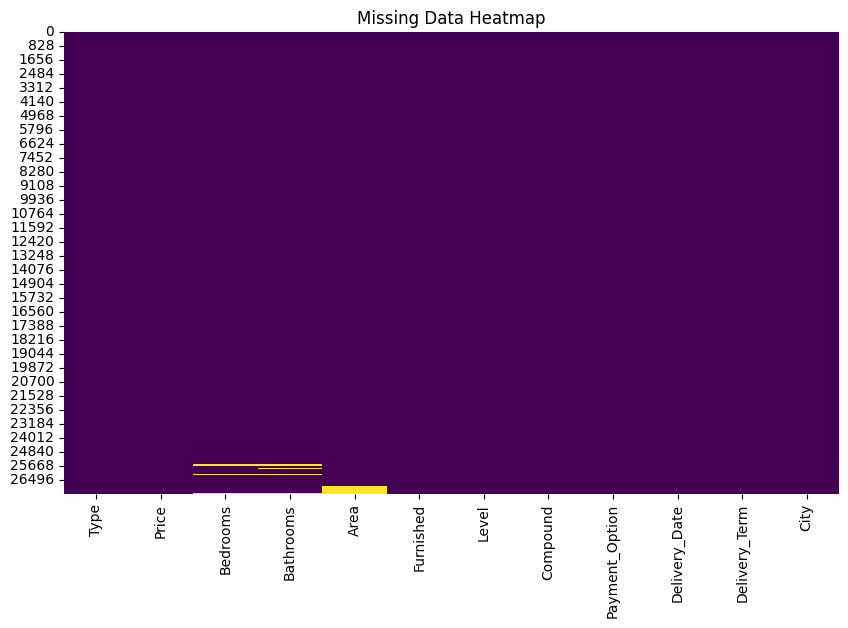

,0
Type,0
Price,0
Bedrooms,203
Bathrooms,171
Area,471
Furnished,0
Level,0
Compound,0
Payment_Option,0
Delivery_Date,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Check for missing values
missing_values = data.isnull().sum()


# Visualize missing data to assess scale
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

missing_values


*Method* One :
Uses the mean ,largest disadvatage is that if skewed the final result is skewed (Prompted with GPT )

In [ ]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="median")

data["Bedrooms"] = imputer.fit_transform(data[["Bedrooms"]])
data["Bathrooms"] = imputer.fit_transform(data[["Bathrooms"]])
data["Area"] = imputer.fit_transform(data[["Area"]])

# Verify no missing values remain
missing_after_imputation = data.isnull().sum()

# Display the remaining missing values count
missing_after_imputation


,0
Type,0
Price,0
Bedrooms,0
Bathrooms,0
Area,0
Furnished,0
Level,0
Compound,0
Payment_Option,0
Delivery_Date,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify categorical and numeric columns
categorical_cols = ["Type", "Furnished", "Level", "Compound", "Payment_Option", "Delivery_Date", "Delivery_Term", "City"]
numeric_cols = ["Price", "Bedrooms", "Bathrooms", "Area"]

# Handle missing values
# For numeric columns, fill missing values with the median
num_imputer = SimpleImputer(strategy="median")
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

# Encode categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify preprocessing steps
print(data.head())


   Type     Price  Bedrooms  Bathrooms      Area  Furnished  Level  Compound  \
0     1 -0.693387 -1.026706  -0.601765 -1.366457          2     13       166   
1     0 -0.482053 -0.198882   0.138806 -1.366457          0      5       530   
2     4  3.582070  1.456768   2.360519 -1.360199          0     13       355   
3     1 -0.260373 -1.026706  -0.601765 -1.353941          0     11       328   
4     0 -0.537029 -0.198882  -0.601765 -1.341426          0      4        60   

   Payment_Option  Delivery_Date  Delivery_Term  City  
0               0              6              1    12  
1               3              6              4   121  
2               0              6              0   121  
3               0              6              1   125  
4               2              8              4   121  


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
categorical_cols = ["Type", "Furnished", "Level", "Compound", "Payment_Option", "Delivery_Date", "Delivery_Term", "City"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Scale numeric features - Specify the numeric columns to scale
scaler = StandardScaler()
numeric_cols = ["Price", "Bedrooms", "Bathrooms", "Area"]  # List your numeric columns here
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify preprocessing steps
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,1,-0.693387,-1.026706,-0.601765,-1.366457,2,13,166,0,6,1,12
1,0,-0.482053,-0.198882,0.138806,-1.366457,0,5,530,3,6,4,121
2,4,3.582070,1.456768,2.360519,-1.360199,0,13,355,0,6,0,121
3,1,-0.260373,-1.026706,-0.601765,-1.353941,0,11,328,0,6,1,125
4,0,-0.537029,-0.198882,-0.601765,-1.341426,0,4,60,2,8,4,121


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


# Split the data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns in X_train are numeric before fitting the model
X_train = X_train.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.25999224256294134, 0.4853705098923766)

Feature Importance Insights:
Top Predictors:

In [ ]:
!pip install seaborn

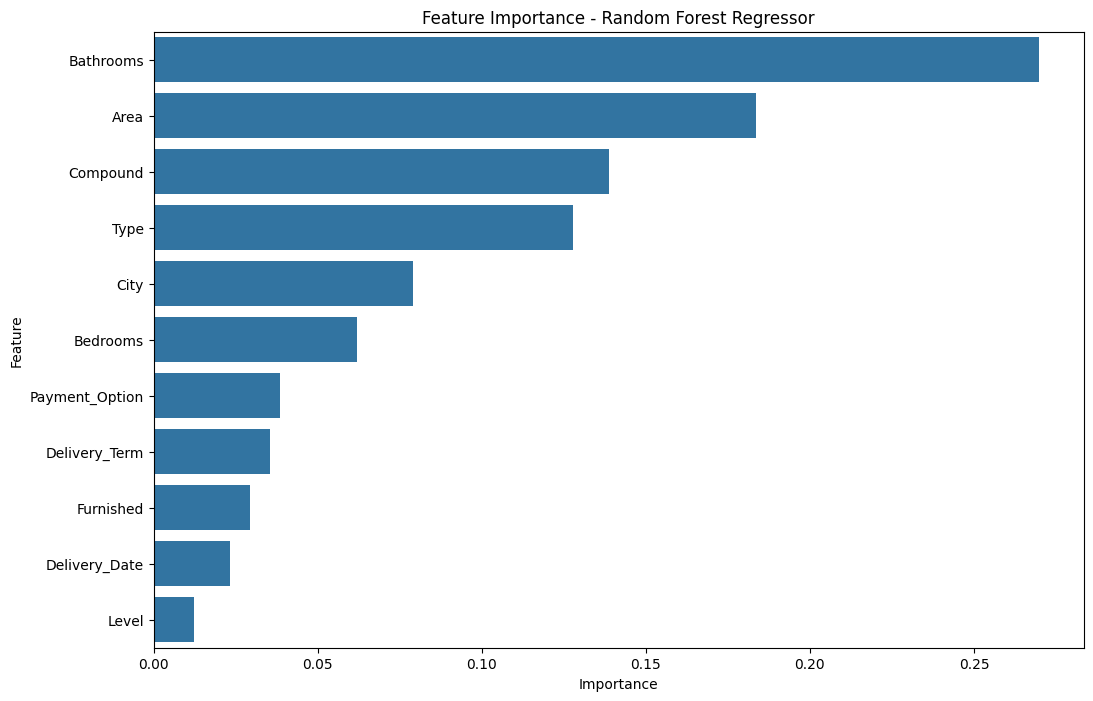

,Feature,Importance
0,Bathrooms,0.269887
1,Area,0.183664
2,Compound,0.138790
3,Type,0.127834
4,City,0.078945
5,Bedrooms,0.062089
6,Payment_Option,0.038456
7,Delivery_Term,0.035374
8,Furnished,0.029291
9,Delivery_Date,0.023375


In [ ]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create the feature importance DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,  # Ensure X.columns matches the model input
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Display the feature importance data
feature_importance_df.reset_index(drop=True)



In [ ]:
!pip install xgboost scikit-learn

In [ ]:
!pip install --upgrade xgboost scikit-learn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Split your data (replace 'X' and 'y' with your actual features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, objective="reg:squarederror")

# Define the parameter grid for randomized search
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the Randomized Search on training data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and model performance
best_xgb_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate on the test set
y_pred_xgb = best_xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print("Best Parameters:", best_params)
print("Mean Absolute Error (Test Set):", mae_xgb)
print("R^2 Score (Test Set):", r2_xgb)


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

In [ ]:
# Re-attempt the Gradient Boosting Randomized Search with hyperparameter tuning
random_search_gb.fit(X_train, y_train)

# Extract best parameters and evaluate the model
best_gb_model = random_search_gb.best_estimator_
best_params_gb = random_search_gb.best_params_

# Predictions and performance metrics on the test set
y_pred_gb = best_gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

best_params_gb, mae_gb, r2_gb


Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1},
 1782453.6052562469,
 0.4665433033480826)

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices - XGBoost Model")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()


In [ ]:
import numpy as np

# Feature importance plot
feature_importances = best_xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title("Feature Importance - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a scatter plot to compare predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices - XGBoost Model")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

# Plotting feature importance for XGBoost model
feature_importances = best_xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title("Feature Importance - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Method 2 : Overcoming the Skew

Missing Values in Numeric Columns:
Price          0
Bedrooms     203
Bathrooms    171
Area         471
dtype: int64

Missing Values in Categorical Columns:
Type              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64


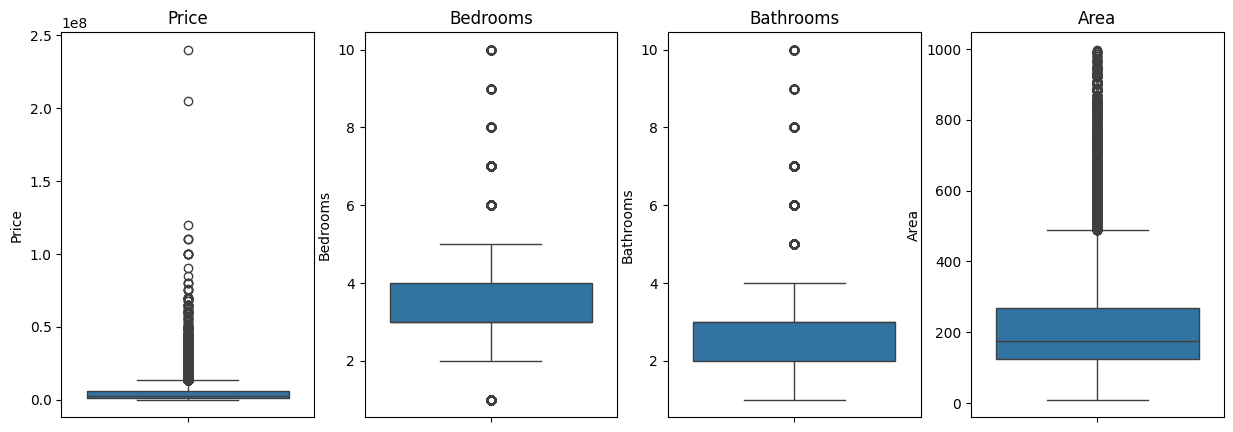


Processed Data Sample:
   Type     Price  Bedrooms  Bathrooms      Area  Furnished  Level  Compound  \
0     1 -0.693387 -1.026706  -0.601765 -1.366457          2     13       166   
1     0 -0.482053 -0.198882   0.138806 -1.366457          0      5       530   
2     4  3.582070  1.456768   2.360519 -1.360199          0     13       355   
3     1 -0.260373 -1.026706  -0.601765 -1.353941          0     11       328   
4     0 -0.537029 -0.198882  -0.601765 -1.341426          0      4        60   

   Payment_Option  Delivery_Date  Delivery_Term  City  Price_per_Area  \
0               0              6              1    12        0.507434   
1               3              6              4   121        0.352776   
2               0              6              0   121       -2.633489   
3               0              6              1   125        0.192308   
4               2              8              4   121        0.400342   

   Total_Rooms  
0    -1.628471  
1    -0.060075  
2    

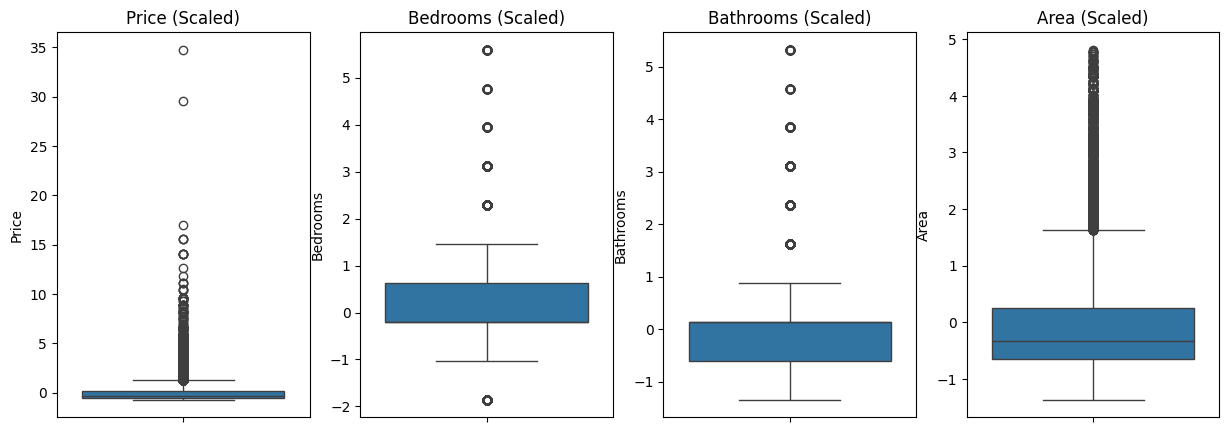

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("Inca Tribe House Prices.csv")

# Identify categorical and numeric columns
categorical_cols = ["Type", "Furnished", "Level", "Compound", "Payment_Option", "Delivery_Date", "Delivery_Term", "City"]
numeric_cols = ["Price", "Bedrooms", "Bathrooms", "Area"]

# Step 1: Check for missing values
print("Missing Values in Numeric Columns:")
print(data[numeric_cols].isnull().sum())

print("\nMissing Values in Categorical Columns:")
print(data[categorical_cols].isnull().sum())

# Step 2: Handle missing values
# For numeric columns, fill missing values with the median
num_imputer = SimpleImputer(strategy="median")
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

# For categorical columns, fill missing values with "Unknown"
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Step 3: Check for outliers in numeric columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data[col])
    plt.title(col)
plt.show()

# Step 4: Encode categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Step 5: Scale numeric features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Step 6: Feature Engineering
data["Price_per_Area"] = data["Price"] / data["Area"]
data["Total_Rooms"] = data["Bedrooms"] + data["Bathrooms"]

# Step 7: Verify preprocessing steps
print("\nProcessed Data Sample:")
print(data.head())

# Step 8: Verify scaling and encoding
print("\nDescriptive Statistics After Preprocessing:")
print(data[numeric_cols + ["Price_per_Area", "Total_Rooms"]].describe())

# Step 9: Visualize scaled numeric features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data[col])
    plt.title(f"{col} (Scaled)")
plt.show()

In [ ]:
!pip install xgboost
!pip install scikit-learn

In [ ]:
!pip install --upgrade scikit-learn xgboost

Train-Test Split:

The dataset is split into 80% training and 20% testing using train_test_split.

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.02542202487874839
Mean Squared Error (MSE): 0.1093779107907487
Root Mean Squared Error (RMSE): 0.3307233145557608
R^2 Score: 0.8950621401707127


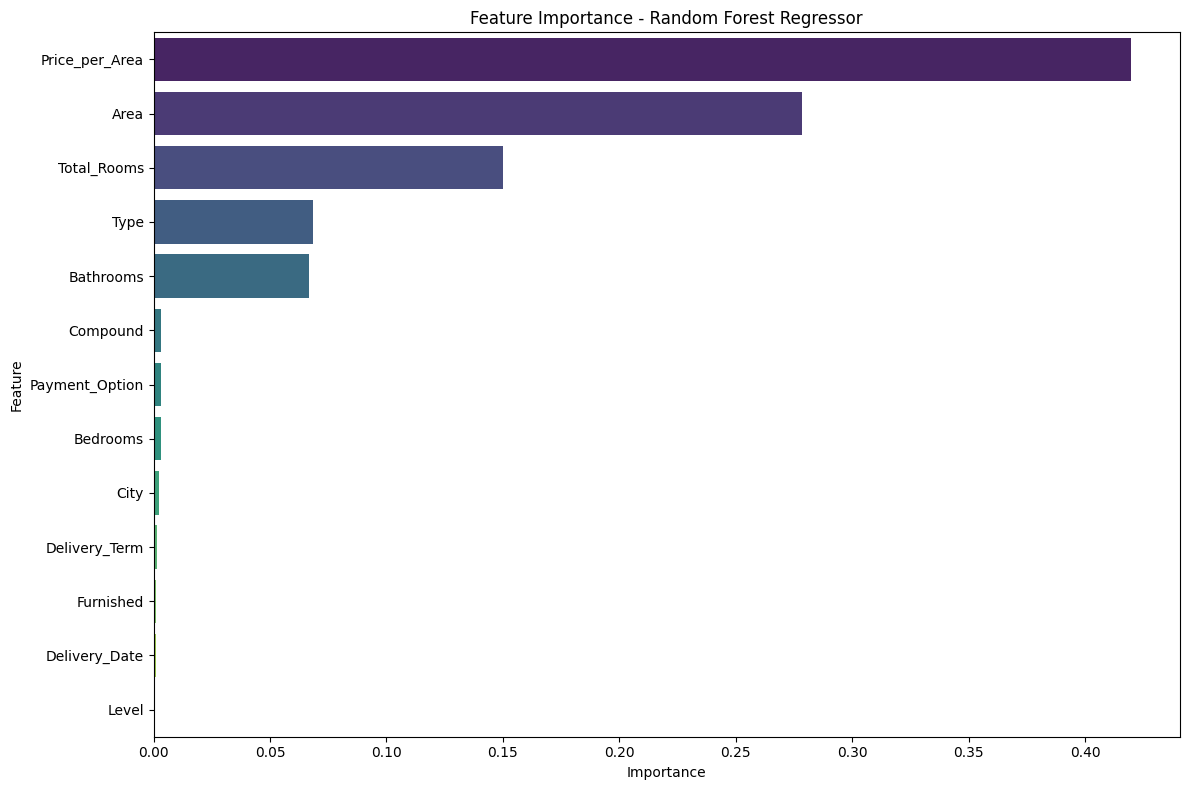


Feature Importances:
           Feature  Importance
11  Price_per_Area    0.419816
3             Area    0.278462
12     Total_Rooms    0.149870
0             Type    0.068552
2        Bathrooms    0.066845
6         Compound    0.003297
7   Payment_Option    0.003205
1         Bedrooms    0.003157
10            City    0.002490
9    Delivery_Term    0.001699
4        Furnished    0.000985
8    Delivery_Date    0.000889
5            Level    0.000732


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Separate features (X) and target variable (y)
X = data.drop(columns=["Price"])  # Drop the target column
y = data["Price"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 6: Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Step 7: Feature Importance Visualization
importances = rf_model.feature_importances_

# Create a feature importance DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display feature importance DataFrame
print("\nFeature Importances:")
print(feature_importance_df)


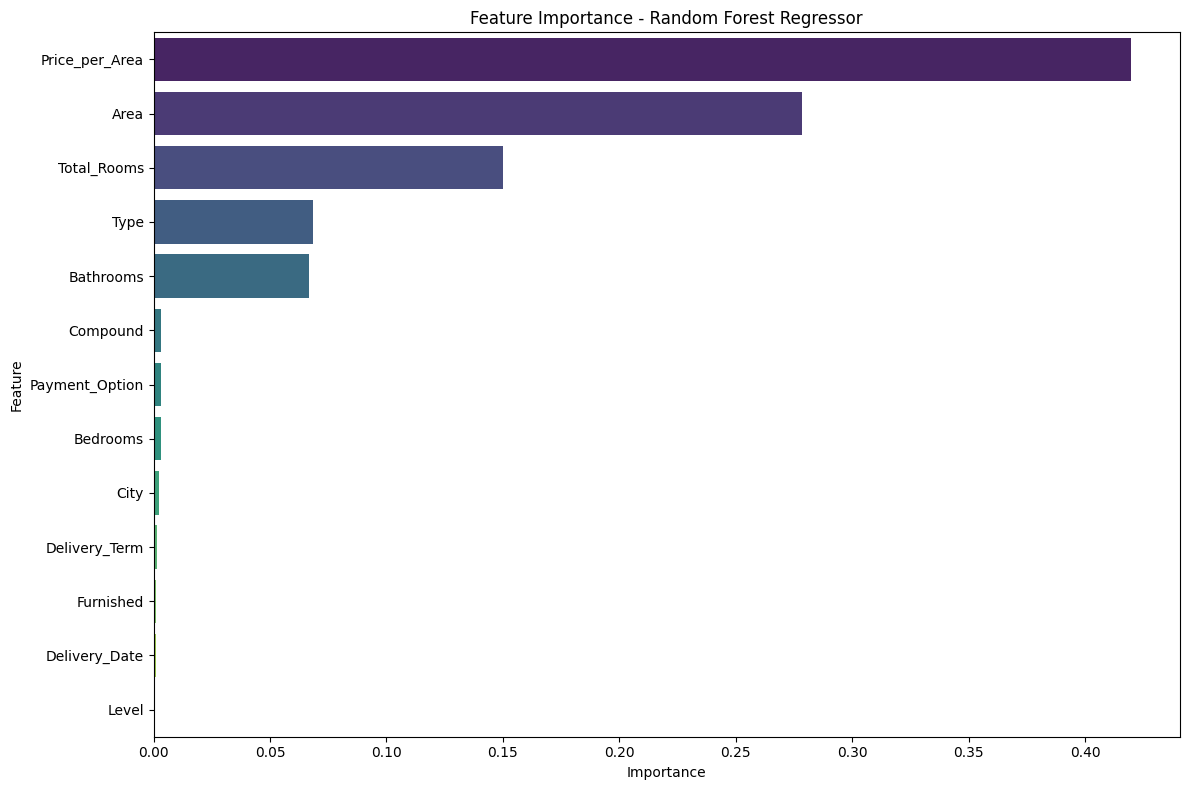


Feature Importances DataFrame:
           Feature  Importance
0   Price_per_Area    0.419816
1             Area    0.278462
2      Total_Rooms    0.149870
3             Type    0.068552
4        Bathrooms    0.066845
5         Compound    0.003297
6   Payment_Option    0.003205
7         Bedrooms    0.003157
8             City    0.002490
9    Delivery_Term    0.001699
10       Furnished    0.000985
11   Delivery_Date    0.000889
12           Level    0.000732


In [ ]:
# Step 8: Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Step 9: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,  # X_train must match the model input
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Step 10: Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 11: Display the feature importance DataFrame
print("\nFeature Importances DataFrame:")
print(feature_importance_df.reset_index(drop=True))


In [ ]:
!pip install scikit-learn xgboost numpy pandas matplotlib seaborn

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


[I 2025-01-23 06:36:07,139] A new study created in memory with name: no-name-ff396e53-025d-4bb2-8155-19a5ca9f7336
[I 2025-01-23 06:36:16,571] Trial 0 finished with value: 0.055167899999082046 and parameters: {'n_estimators': 181, 'max_depth': 9, 'learning_rate': 0.25034051250812506, 'subsample': 0.9450188434036945, 'colsample_bytree': 0.7029885470014026}. Best is trial 0 with value: 0.055167899999082046.
[I 2025-01-23 06:36:20,333] Trial 1 finished with value: 0.0626275805569949 and parameters: {'n_estimators': 450, 'max_depth': 3, 'learning_rate': 0.25925904592172033, 'subsample': 0.9810890631395894, 'colsample_bytree': 0.7215435664608065}. Best is trial 0 with value: 0.055167899999082046.
[I 2025-01-23 06:36:25,320] Trial 2 finished with value: 0.04569723204008341 and parameters: {'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.19877482212235847, 'subsample': 0.7347208296840552, 'colsample_bytree': 0.8225714533862599}. Best is trial 2 with value: 0.04569723204008341.
[I 2025-

Best Parameters: {'n_estimators': 462, 'max_depth': 9, 'learning_rate': 0.08284975078241547, 'subsample': 0.8781126300866134, 'colsample_bytree': 0.931388032141845}
Final Model Mean Absolute Error (Test Set): 0.038296206446638115
Final Model R^2 Score (Test Set): 0.8965779798792509


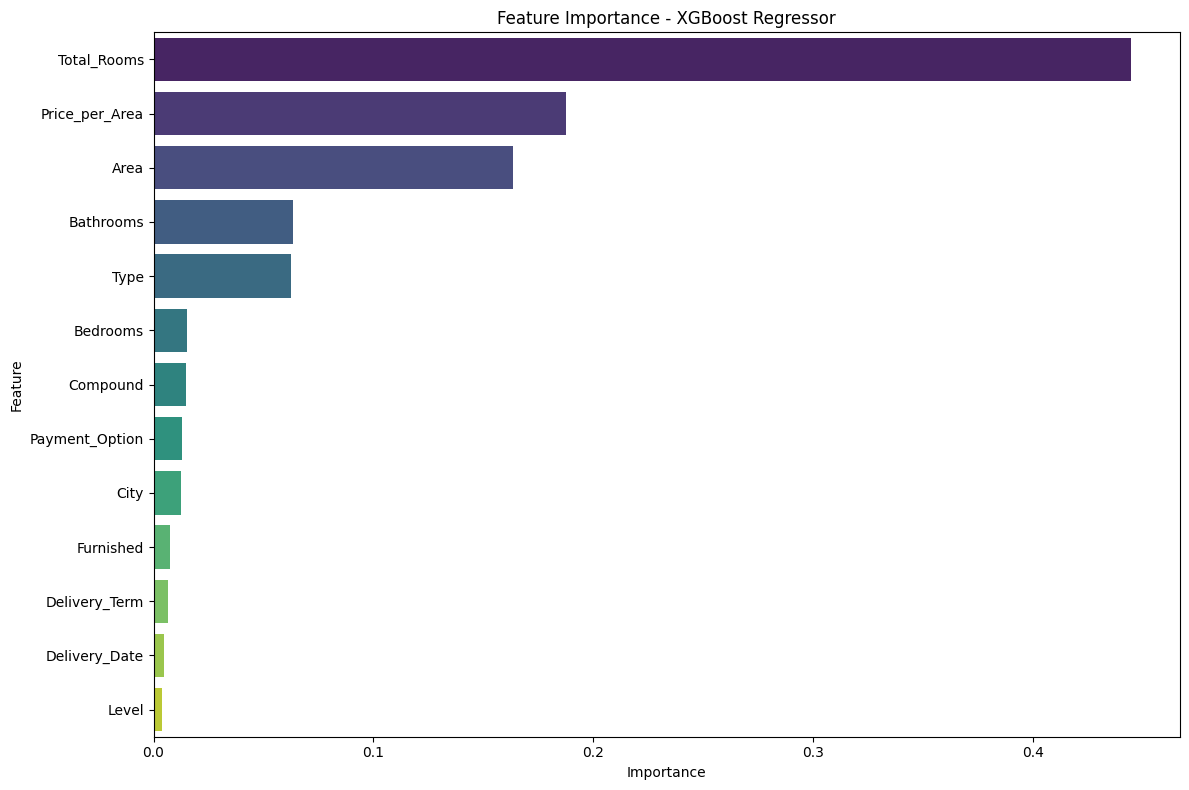


Feature Importances DataFrame:
           Feature  Importance
0      Total_Rooms    0.444774
1   Price_per_Area    0.187707
2             Area    0.163754
3        Bathrooms    0.063310
4             Type    0.062461
5         Bedrooms    0.015031
6         Compound    0.014983
7   Payment_Option    0.012777
8             City    0.012410
9        Furnished    0.007301
10   Delivery_Term    0.006762
11   Delivery_Date    0.004710
12           Level    0.004019


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split the dataset into training and testing sets
# Assuming `X` and `y` are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Optuna objective function for hyperparameter optimization
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "random_state": 42,
        "objective": "reg:squarederror",
    }

    # Initialize the model with the current trial's parameters
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    preds = model.predict(X_test)

    # Calculate the Mean Absolute Error
    mae = mean_absolute_error(y_test, preds)

    # Return the MAE as the metric to minimize
    return mae

# Step 3: Create the Optuna study and optimize
study = optuna.create_study(direction="minimize")  # Minimize the MAE
study.optimize(objective, n_trials=50, timeout=600)  # Run 50 trials or 10 minutes

# Step 4: Retrieve the best hyperparameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Step 5: Train the final model with the best hyperparameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Step 6: Evaluate the final model on the test set
y_pred_xgb = best_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Final Model Mean Absolute Error (Test Set):", mae_xgb)
print("Final Model R^2 Score (Test Set):", r2_xgb)

# Step 7: Feature Importance Visualization
importances = best_model.feature_importances_

# Create a feature importance DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,  # Use actual feature names from the dataset
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - XGBoost Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display feature importance DataFrame
print("\nFeature Importances DataFrame:")
print(feature_importance_df.reset_index(drop=True))


In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42
    }

    # Initialize the model with the current trial's parameters
    model = GradientBoostingRegressor(**params)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    preds = model.predict(X_test)

    # Evaluate the model using Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, preds)

    # Return MAE (the metric to minimize)
    return mae

# Step 2: Create an Optuna study and optimize
study = optuna.create_study(direction="minimize")  # Minimize the MAE
study.optimize(objective, n_trials=50, timeout=600)  # Run 50 trials or for 10 minutes

# Step 3: Retrieve the best hyperparameters
best_params_gb = study.best_params
print("Best Parameters (Gradient Boosting):", best_params_gb)

# Step 4: Train the final model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params_gb)
best_gb_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
y_pred_gb = best_gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the final evaluation metrics
print("Mean Absolute Error (Test Set, GB):", mae_gb)
print("R^2 Score (Test Set, GB):", r2_gb)

# Output best parameters and metrics
best_params_gb, mae_gb, r2_gb


[I 2025-01-23 06:50:33,916] A new study created in memory with name: no-name-2b061095-b994-4daa-9160-daaf2c53ec73
[I 2025-01-23 06:51:09,591] Trial 0 finished with value: 0.027229592268566583 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.04632734718321155, 'subsample': 0.6023032676277008, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.027229592268566583.
[I 2025-01-23 06:51:13,523] Trial 1 finished with value: 0.0965118170546821 and parameters: {'n_estimators': 162, 'max_depth': 3, 'learning_rate': 0.1709643548330171, 'subsample': 0.6587844848747129, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.027229592268566583.
[I 2025-01-23 06:51:26,098] Trial 2 finished with value: 0.05263014659119697 and parameters: {'n_estimators': 252, 'max_depth': 5, 'learning_rate': 0.0823151274625891, 'subsample': 0.8301393881579235, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.02722959

Best Parameters (Gradient Boosting): {'n_estimators': 497, 'max_depth': 9, 'learning_rate': 0.1294210071678887, 'subsample': 0.8313501429356159, 'min_samples_split': 4, 'min_samples_leaf': 1}
Mean Absolute Error (Test Set, GB): 0.023493373322722378
R^2 Score (Test Set, GB): 0.9228635032914027


({'n_estimators': 497,
  'max_depth': 9,
  'learning_rate': 0.1294210071678887,
  'subsample': 0.8313501429356159,
  'min_samples_split': 4,
  'min_samples_leaf': 1},
 0.023493373322722378,
 0.9228635032914027)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Step 2: Define the parameter grid for randomized search
param_grid_gb = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Step 3: Perform Randomized Search Cross Validation for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid_gb,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the Randomized Search on training data
random_search_gb.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and model performance
best_gb_model = random_search_gb.best_estimator_
best_params_gb = random_search_gb.best_params_

# Step 6: Evaluate on the test set
y_pred_gb = best_gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print("Best Parameters (Gradient Boosting):", best_params_gb)
print("Mean Absolute Error (Test Set, GB):", mae_gb)
print("R^2 Score (Test Set, GB):", r2_gb)

# Output best parameters and metrics
best_params_gb, mae_gb, r2_gb


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

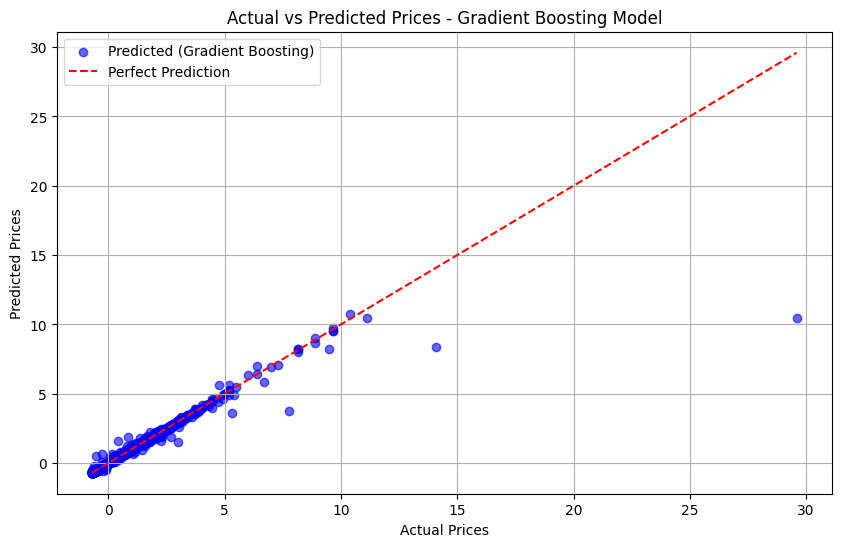

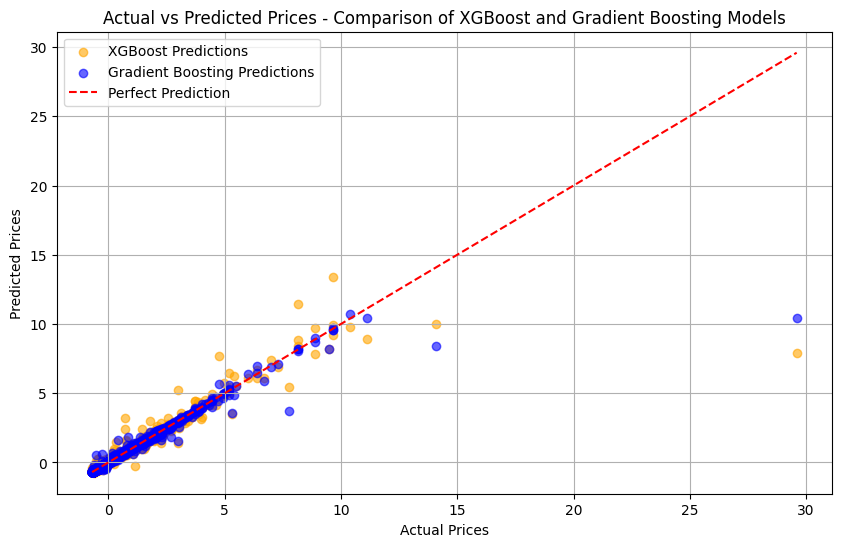

In [ ]:
# Scatter plot for actual vs predicted prices (Gradient Boosting)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, label="Predicted (Gradient Boosting)", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.title("Actual vs Predicted Prices - Gradient Boosting Model")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()

# Scatter plot to compare XGBoost and Gradient Boosting predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label="XGBoost Predictions", color="orange")
plt.scatter(y_test, y_pred_gb, alpha=0.6, label="Gradient Boosting Predictions", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.title("Actual vs Predicted Prices - Comparison of XGBoost and Gradient Boosting Models")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()


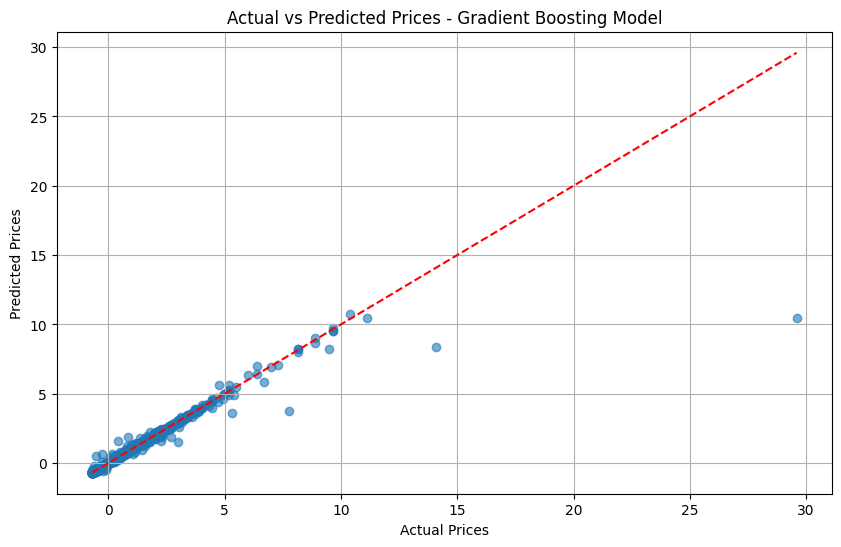

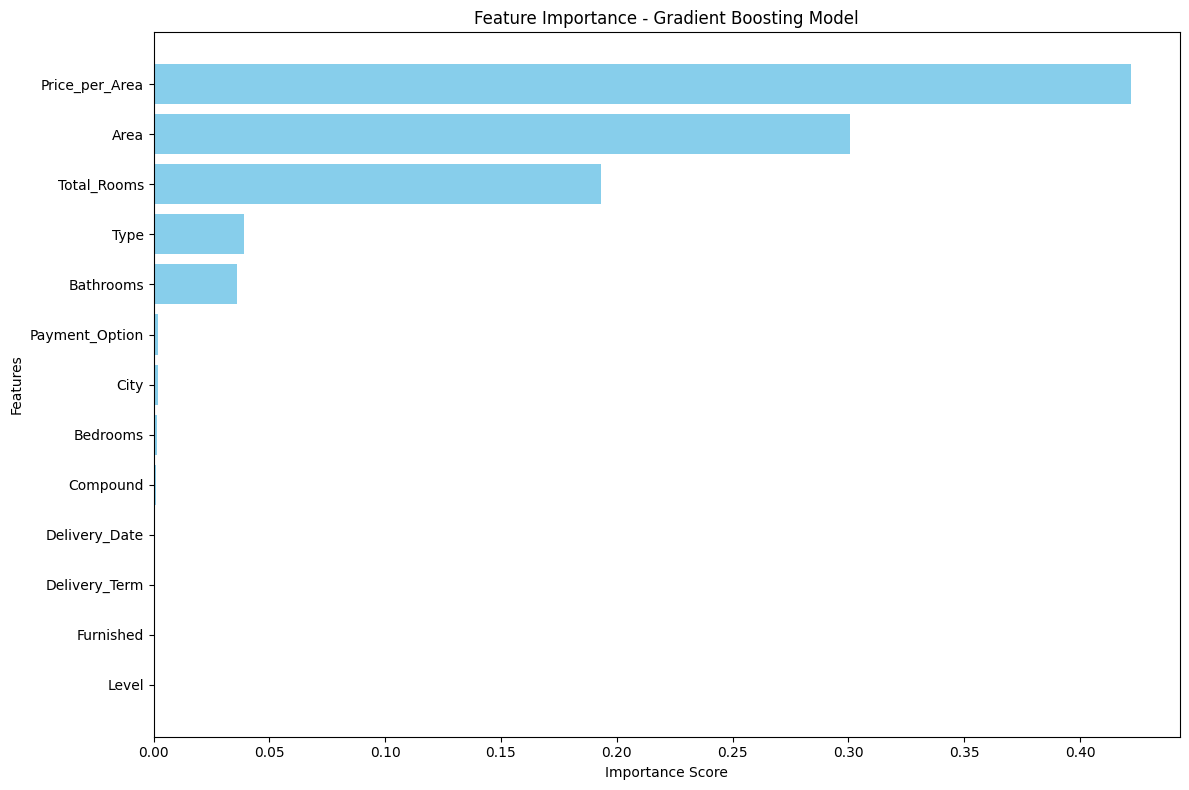

In [ ]:
# Scatter plot for Actual vs Predicted values - Gradient Boosting Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices - Gradient Boosting Model")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

# Plotting feature importance for Gradient Boosting model
feature_importances_gb = best_gb_model.feature_importances_
sorted_idx_gb = np.argsort(feature_importances_gb)
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx_gb)), feature_importances_gb[sorted_idx_gb], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx_gb)), [features[i] for i in sorted_idx_gb])
plt.title("Feature Importance - Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


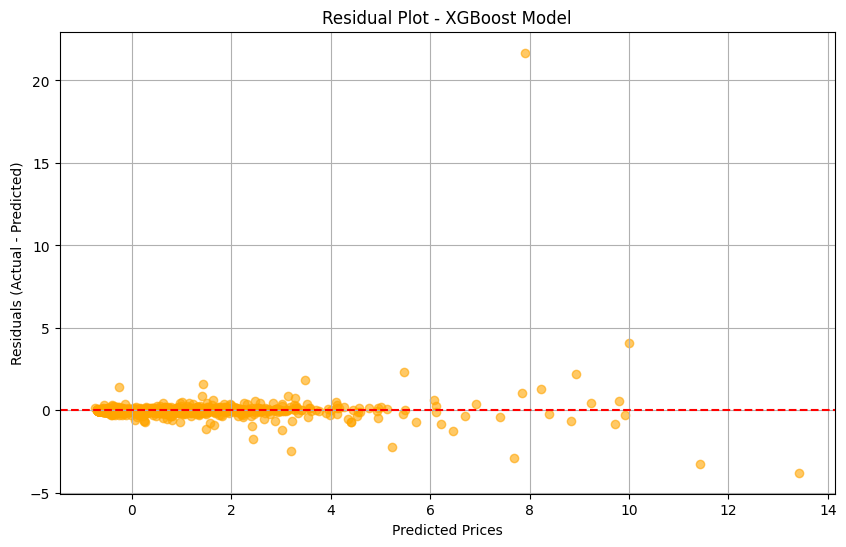

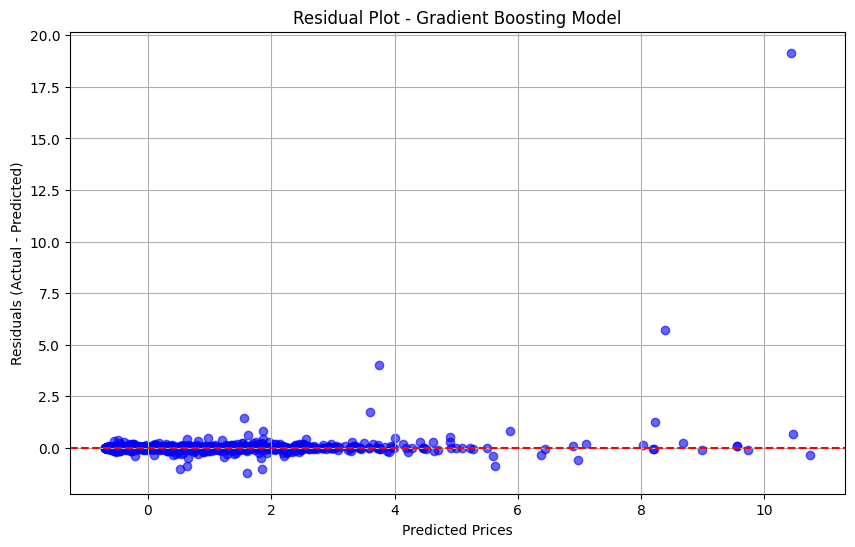

In [ ]:
# Residuals for XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residual Plot - XGBoost Model")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()

# Residuals for Gradient Boosting
residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residual Plot - Gradient Boosting Model")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()


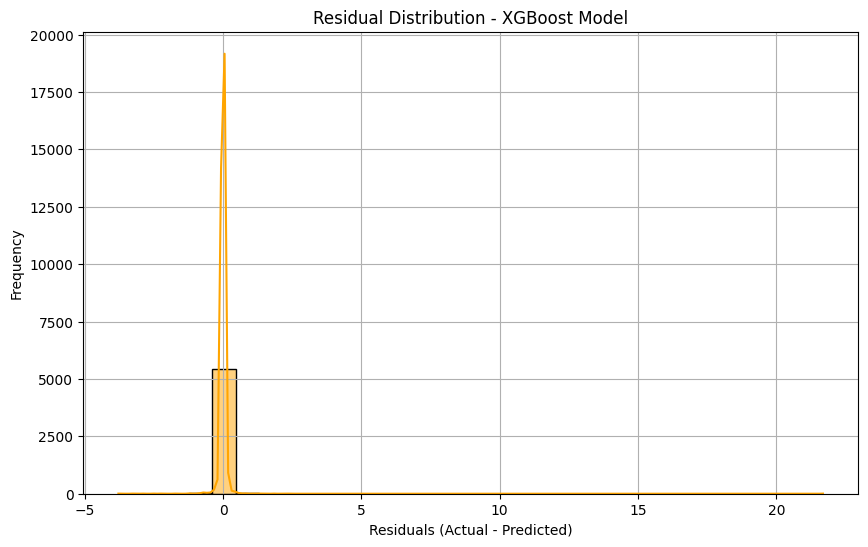

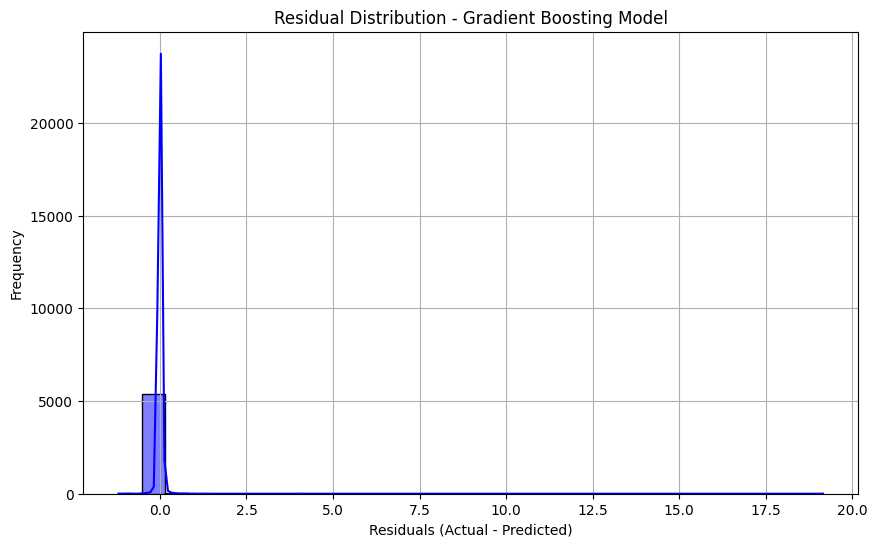

In [ ]:
# Residual distribution for XGBoost
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='orange', bins=30)
plt.title("Residual Distribution - XGBoost Model")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Residual distribution for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gb, kde=True, color='blue', bins=30)
plt.title("Residual Distribution - Gradient Boosting Model")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


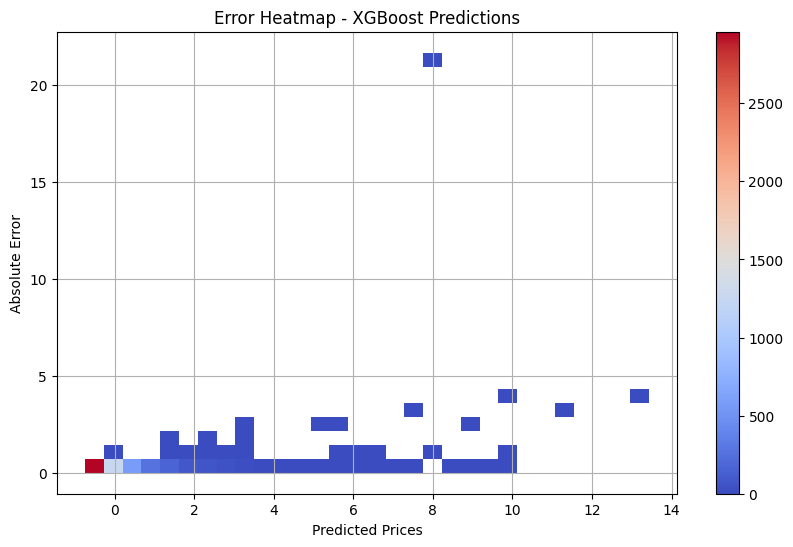

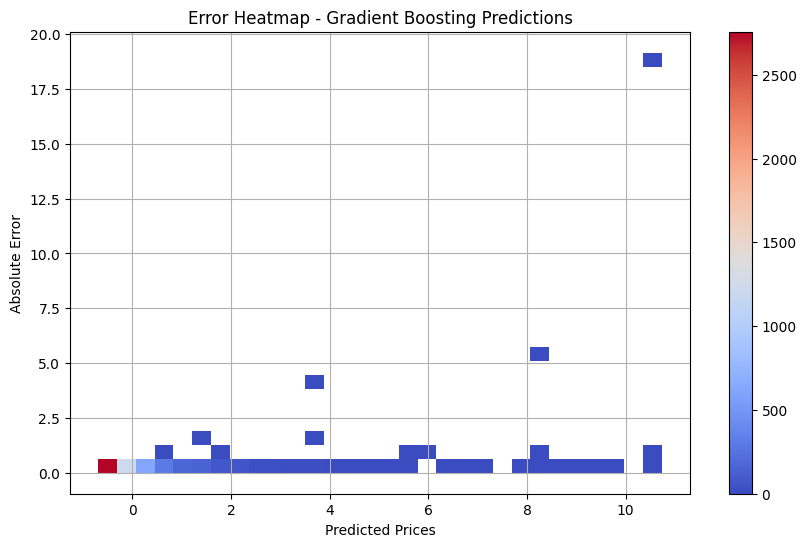

In [ ]:
# Error heatmap for XGBoost
error_xgb = np.abs(residuals_xgb)
plt.figure(figsize=(10, 6))
sns.histplot(x=y_pred_xgb, y=error_xgb, bins=30, cmap="coolwarm", cbar=True)
plt.title("Error Heatmap - XGBoost Predictions")
plt.xlabel("Predicted Prices")
plt.ylabel("Absolute Error")
plt.grid()
plt.show()

# Error heatmap for Gradient Boosting
error_gb = np.abs(residuals_gb)
plt.figure(figsize=(10, 6))
sns.histplot(x=y_pred_gb, y=error_gb, bins=30, cmap="coolwarm", cbar=True)
plt.title("Error Heatmap - Gradient Boosting Predictions")
plt.xlabel("Predicted Prices")
plt.ylabel("Absolute Error")
plt.grid()
plt.show()


Applying LLMS

In [ ]:
# Install dependencies
!pip install transformers accelerate

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install transformers accelerate

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Inca Tribe House Prices.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Preprocess the data (handle missing values, if any)
data = data.ffill()

# Prepare the data for GPT-2
def prepare_data(X, y=None):
    texts = []
    for i in range(len(X)):  # Iterate using the length of X
        row = X.iloc[i]  # Access the row using iloc
        text = f"Type: {row['Type']}, Bedrooms: {row['Bedrooms']}, Bathrooms: {row['Bathrooms']}, Area: {row['Area']}, City: {row['City']}."
        if y is not None:
            text += f" Predicted Price: {y.iloc[i]}"  # Access y using iloc
        texts.append(text)
    return texts

# Split the data into train and test sets
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare train and test texts
train_texts = prepare_data(X_train, y_train)
test_texts = prepare_data(X_test)


In [ ]:
from transformers import TrainingArguments, Trainer
import torch

# Set the tokenizer's padding token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512, return_tensors="pt")

# Prepare the labels (GPT-2 uses input_ids as labels for causal language modeling)
train_labels = train_encodings["input_ids"].clone()

# Define training arguments
training_args = TrainingArguments(
    output_dir="./gpt2_results",        # Directory to save results
    eval_strategy="epoch",             # Evaluate at the end of each epoch
    learning_rate=2e-5,                # Learning rate
    num_train_epochs=3,                # Number of epochs
    per_device_train_batch_size=2,     # Training batch size
    per_device_eval_batch_size=2,      # Evaluation batch size
    weight_decay=0.01,                 # Weight decay
    save_strategy="epoch",             # Save model at the end of each epoch
    push_to_hub=False,                 # Do not push to Hugging Face Hub
    report_to="none"                   # Disable logging to WandB or other platforms
)

# Create datasets for training and evaluation
train_dataset = torch.utils.data.TensorDataset(
    train_encodings["input_ids"], train_encodings["attention_mask"], train_labels
)
eval_dataset = torch.utils.data.TensorDataset(
    test_encodings["input_ids"], test_encodings["attention_mask"], test_encodings["input_ids"]
)

# Define a data collator to handle padding and labels
def data_collator(data):
    return {
        "input_ids": torch.stack([f[0] for f in data]),
        "attention_mask": torch.stack([f[1] for f in data]),
        "labels": torch.stack([f[0] for f in data])  # GPT-2 uses input_ids as labels
    }

# Define the Trainer
trainer = Trainer(
    model=model,                      # Pre-trained GPT-2 model
    args=training_args,               # Training arguments
    train_dataset=train_dataset,      # Training dataset
    eval_dataset=eval_dataset,        # Evaluation dataset
    data_collator=data_collator       # Data collator for padding and labels
)

# Fine-tune the model
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.410700,1.026714
2,0.389300,1.155467
3,0.382000,1.354018


TrainOutput(global_step=32787, training_loss=0.3899933393270538, metrics={'train_runtime': 2937.0268, 'train_samples_per_second': 22.326, 'train_steps_per_second': 11.163, 'total_flos': 1505845883520000.0, 'train_loss': 0.3899933393270538, 'epoch': 3.0})

In [ ]:
# Prepare the data
def prepare_data(X, y=None):
    texts = []
    for i, row in X.iterrows():
        text = f"Type: {row['Type']}, Bedrooms: {row['Bedrooms']}, Bathrooms: {row['Bathrooms']}, Area: {row['Area']}, City: {row['City']}."
        if y is not None:
            text += f" Predicted Price: {y.iloc[i]}"  # Use iloc to access the correct row
        texts.append(text)
    return texts

# Ensure indices are reset to match
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Prepare training and test data
train_texts = prepare_data(X_train, y_train)
test_texts = prepare_data(X_test)


In [ ]:
tokenizer.padding_side = "left"


In [ ]:
max_length = 256  # Adjust based on your data
pred_encodings = tokenizer(pred_texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")


In [ ]:
batch_size = 8  # Smaller batch size to fit in GPU memory


In [ ]:
model.gradient_checkpointing_enable()


In [ ]:
import torch

# Configure tokenizer
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"  # Use left-padding for GPT-2

# Define batch size and max sequence length
batch_size = 8
max_length = 256

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Generate predictions in batches
predictions = []
for i in range(0, len(pred_texts), batch_size):
    # Process batch
    batch_texts = pred_texts[i : i + batch_size]
    batch_encodings = tokenizer(
        batch_texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt"
    ).to(device)

    # Generate outputs
    with torch.no_grad():  # Disable gradients during inference
        batch_outputs = model.generate(
            input_ids=batch_encodings["input_ids"],
            attention_mask=batch_encodings["attention_mask"],
            pad_token_id=tokenizer.eos_token_id,
            max_length=max_length,
        )

    # Decode predictions
    batch_predictions = [tokenizer.decode(output, skip_special_tokens=True) for output in batch_outputs]
    predictions.extend(batch_predictions)

    # Clear GPU memory
    del batch_encodings, batch_outputs
    torch.cuda.empty_cache()

# Display some results
for i, pred in enumerate(predictions[:5]):
    print(f"Predicted: {pred}\nActual: {y_test.iloc[i]}\n")


Predicted: Type: Stand Alone Villa, Bedrooms: 3.0, Bathrooms: 3.0, Area: 190.0, City: 6th of October. Predicted Price: 4200000
Actual: 2975000

Predicted: Type: Studio, Bedrooms: 2.0, Bathrooms: 1.0, Area: 75.0, City: North Coast. Predicted Price: 800000
Actual: 1900000

Predicted: Type: Apartment, Bedrooms: 3.0, Bathrooms: 2.0, Area: 210.0, City: Zezenia. Predicted Price: 3000000
Actual: 3500000

Predicted: Type: Chalet, Bedrooms: 2.0, Bathrooms: 2.0, Area: 92.0, City: North Coast. Predicted Price: 2700000
Actual: 1772307

Predicted: Type: Chalet, Bedrooms: 3.0, Bathrooms: 2.0, Area: 120.0, City: Ain Sukhna. Predicted Price: 3000000
Actual: 550000



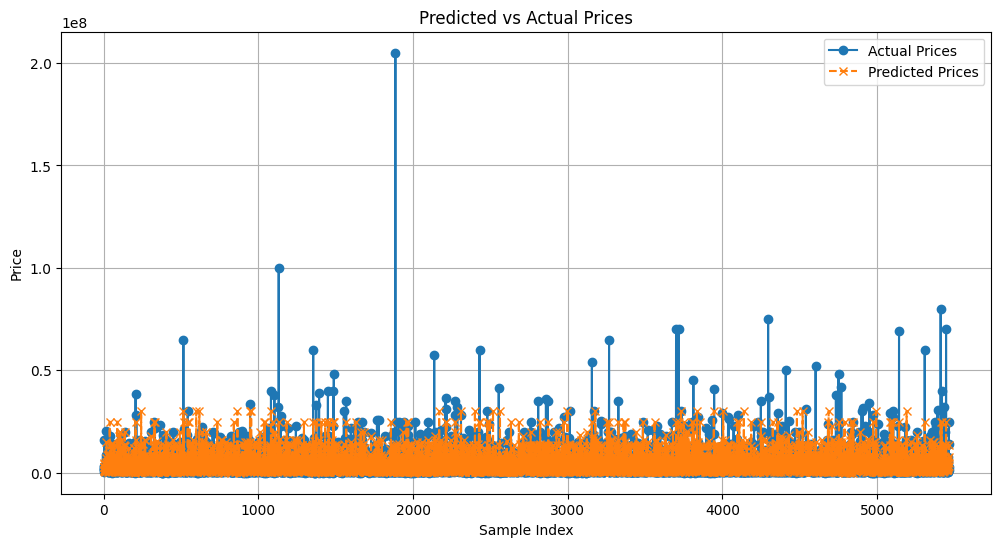

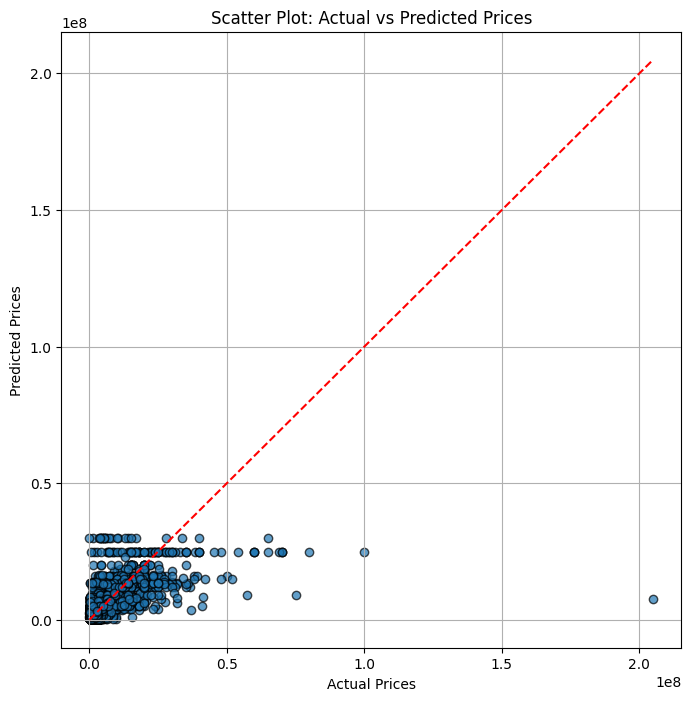

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
actual_prices = y_test.reset_index(drop=True)[:len(predictions)]  # Match predictions length
predicted_prices = predictions[:len(actual_prices)]  # Ensure equal length

# Convert predicted prices to float if they are strings
predicted_prices_float = [float(pred.split()[-1]) if pred.split()[-1].replace('.', '', 1).isdigit() else 0 for pred in predicted_prices]

# Plot predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(actual_prices)), actual_prices, label="Actual Prices", marker="o", linestyle="-")
plt.plot(range(len(predicted_prices_float)), predicted_prices_float, label="Predicted Prices", marker="x", linestyle="--")
plt.title("Predicted vs Actual Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 8))
plt.scatter(actual_prices, predicted_prices_float, alpha=0.7, edgecolors="k")
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], "r--")
plt.title("Scatter Plot: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()


In [ ]:
# Install folium if not already installed
!pip install folium

import folium
from folium.plugins import MarkerCluster

# Sample data structure with country/city and predictions (replace with actual data)
data = [
    {"city": "New York", "latitude": 40.7128, "longitude": -74.0060, "predicted_price": 1500000, "actual_price": 1600000},
    {"city": "San Francisco", "latitude": 37.7749, "longitude": -122.4194, "predicted_price": 1200000, "actual_price": 1250000},
    {"city": "London", "latitude": 51.5074, "longitude": -0.1278, "predicted_price": 1000000, "actual_price": 1050000},
]

# Initialize the map centered around a specific location
m = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for each prediction
marker_cluster = MarkerCluster().add_to(m)
for d in data:
    folium.Marker(
        location=[d["latitude"], d["longitude"]],
        popup=(
            f"<b>City:</b> {d['city']}<br>"
            f"<b>Predicted Price:</b> ${d['predicted_price']}<br>"
            f"<b>Actual Price:</b> ${d['actual_price']}"
        ),
        tooltip=d["city"],
    ).add_to(marker_cluster)

# Display the map
m


In [ ]:
m.save("predictions_map.html")


In [ ]:
from google.colab import files
files.download("predictions_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


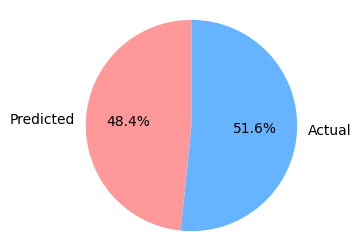
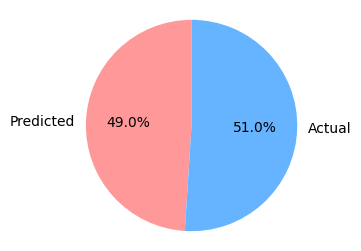
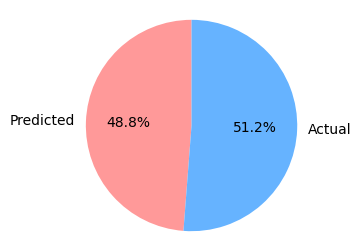
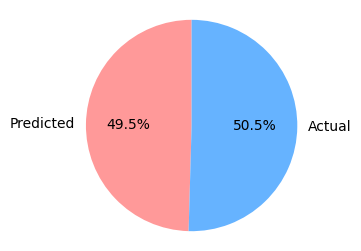

In [ ]:
# Install folium if not already installed
!pip install folium matplotlib

import folium
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Woolworths stores in Johannesburg with data
woolworths_stores = [
    {"store": "Woolworths Sandton City", "latitude": -26.1083, "longitude": 28.0531, "predicted_price": 1500000, "actual_price": 1600000},
    {"store": "Woolworths Rosebank Mall", "latitude": -26.1455, "longitude": 28.0422, "predicted_price": 1200000, "actual_price": 1250000},
    {"store": "Woolworths Eastgate Mall", "latitude": -26.1785, "longitude": 28.1146, "predicted_price": 1000000, "actual_price": 1050000},
    {"store": "Woolworths Cresta Shopping Centre", "latitude": -26.1362, "longitude": 27.9886, "predicted_price": 1100000, "actual_price": 1120000},
]

# Function to create pie chart and return its HTML-encoded image
def create_pie_chart(predicted, actual):
    labels = ['Predicted', 'Actual']
    sizes = [predicted, actual]
    colors = ['#ff9999','#66b3ff']

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Save pie chart to a temporary image file
    tmpfile = BytesIO()
    plt.savefig(tmpfile, format='png', bbox_inches='tight', transparent=True)
    tmpfile.seek(0)

    # Encode the image to base64 for embedding in HTML
    encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
    plt.close(fig)
    return f'<img src="data:image/png;base64,{encoded}" style="width:150px; height:150px;">'

# Initialize map centered on Johannesburg
m = folium.Map(location=[-26.2041, 28.0473], zoom_start=11)

# Add Woolworths stores with pie charts
for store in woolworths_stores:
    pie_chart_html = create_pie_chart(store["predicted_price"], store["actual_price"])
    popup_html = f"""
    <b>Store:</b> {store['store']}<br>
    <b>Predicted Price:</b> ${store['predicted_price']}<br>
    <b>Actual Price:</b> ${store['actual_price']}<br>
    {pie_chart_html}
    """
    folium.Marker(
        location=[store["latitude"], store["longitude"]],
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=store["store"]
    ).add_to(m)

# Display the map
m
